# 데이터 EDA_카드결제 데이터

In [1]:
import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

# font 설정
from matplotlib import font_manager, rc
font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
rc('font', family=font_name)

import warnings
warnings.filterwarnings(action='ignore') 

In [2]:
# 카드결제 데이터 불러오기
card_df = pd.read_csv('04_음식관련 카드소비_CARD_SPENDING.csv',encoding='cp949',parse_dates=['base_date'])
card_df.info()
card_df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 544805 entries, 0 to 544804
Data columns (total 8 columns):
 #   Column      Non-Null Count   Dtype         
---  ------      --------------   -----         
 0   base_date   544805 non-null  datetime64[ns]
 1   city        544805 non-null  object        
 2   emd_cd      544805 non-null  object        
 3   emd_nm      544805 non-null  object        
 4   mct_cat_cd  544805 non-null  object        
 5   mct_cat_nm  544805 non-null  object        
 6   use_cnt     544805 non-null  int64         
 7   use_amt     544805 non-null  int64         
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 33.3+ MB


,base_date,city,emd_cd,emd_nm,mct_cat_cd,mct_cat_nm,use_cnt,use_amt
0,2018-01-06,제주시,50110650,연동,C00100,한식,3643,127777300
1,2018-01-09,제주시,50110650,연동,C00500,패스트푸드,432,6711675
2,2018-01-15,제주시,50110650,연동,C01200,농축수산물,236,16089579
3,2018-01-15,제주시,50110650,연동,A00200,마트/슈퍼마켓,4031,121979867
4,2018-01-20,제주시,50110650,연동,C01000,식품,633,30410674


In [3]:
card_df.loc[card_df['emd_nm']=='알수없음','city'] = '알수없음'
card_df.rename(columns={"emd_nm" : "location"}, inplace=True) # city -> location으로 명칭 변경
card_df = card_df.drop({'city','emd_cd','mct_cat_cd','use_cnt'},axis=1)

In [4]:
# base_date 0000_00 형태로 변환
card_df = card_df.set_index('base_date')
card_df['month']=card_df.index.month 
card_df['year']=card_df.index.year

card_df['month'] =card_df['month'].apply(lambda x: "{:0>2d}".format(x))
card_df['year']=card_df['year'].astype('str')
card_df['month']=card_df['month'].astype('str')
card_df['base_date'] = card_df['year']+'_'+card_df['month']
card_df.head()

,location,mct_cat_nm,use_amt,month,year,base_date
base_date,,,,,,
2018-01-06,연동,한식,127777300,01,2018,2018_01
2018-01-09,연동,패스트푸드,6711675,01,2018,2018_01
2018-01-15,연동,농축수산물,16089579,01,2018,2018_01
2018-01-15,연동,마트/슈퍼마켓,121979867,01,2018,2018_01
2018-01-20,연동,식품,30410674,01,2018,2018_01


In [5]:
card_df = card_df.reset_index(drop=True) # index의 base_date 제거

In [6]:
# 연도별, 월별 배출량 그룹화
card_df_y = card_df.groupby(['year']).sum().reset_index()
card_df_m = card_df.groupby(['base_date']).sum().reset_index()

<BarContainer object of 4 artists>

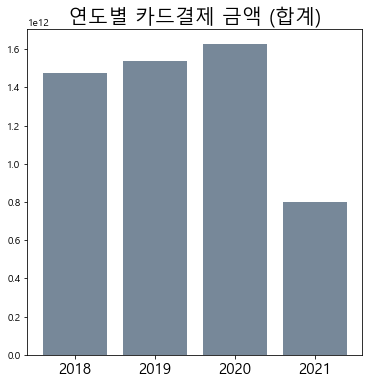

In [7]:
plt.figure(figsize=(6,6))
plt.rc('xtick',labelsize=15)
plt.title("연도별 카드결제 금액 (합계)",fontsize=20)
plt.bar(card_df_y.year, card_df_y.use_amt,color='lightslategrey')
# plt.savefig('y_card.png')

<BarContainer object of 42 artists>

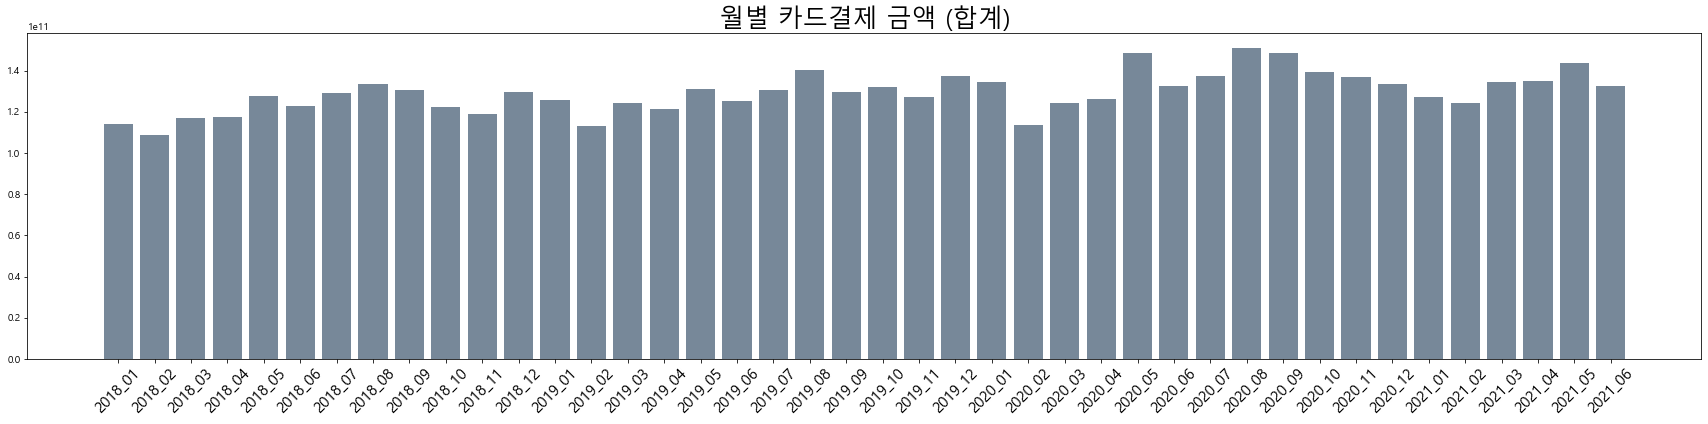

In [8]:
plt.figure(figsize=(30,6))
plt.rc('xtick',labelsize=15)
plt.xticks(rotation=45)
plt.title("월별 카드결제 금액 (합계)",fontsize=25)
plt.bar(card_df_m.base_date, card_df_m.use_amt,color='lightslategrey')
# plt.savefig('m_card.png')

In [9]:
# 지역별 그룹화
card_df_l = card_df.groupby(['base_date','location']).sum().reset_index()
card_df_l

,base_date,location,use_amt
0,2018_01,건입동,2024688672
1,2018_01,구좌읍,1437171016
2,2018_01,남원읍,1878298705
3,2018_01,노형동,12301257150
4,2018_01,대륜동,2414501385
...,...,...,...
1843,2021_06,표선면,1480487884
1844,2021_06,한경면,1096266339
1845,2021_06,한림읍,3090858420
1846,2021_06,화북동,4982321182


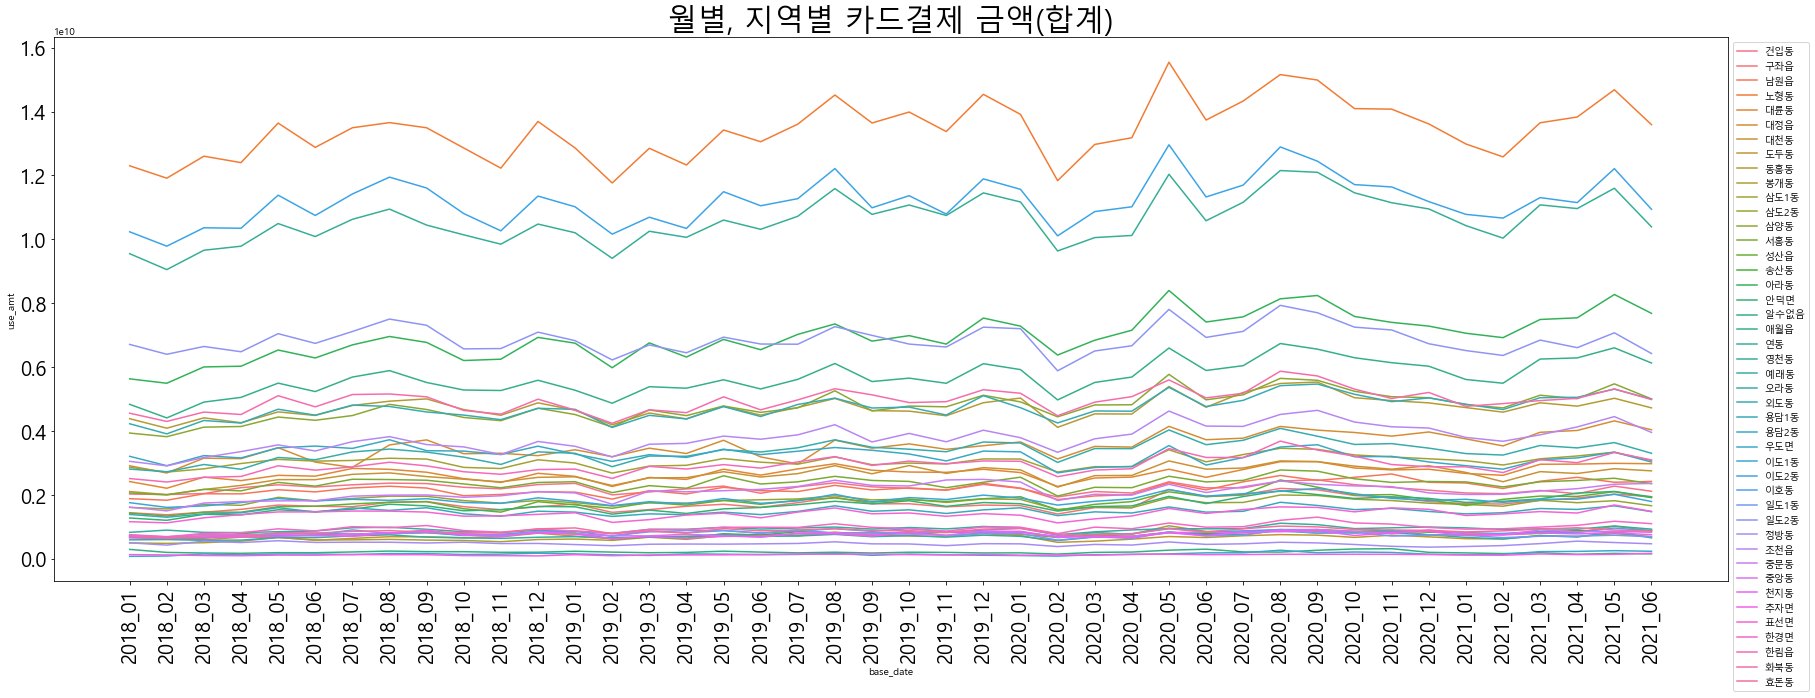

In [10]:
# 지역별, 월별 배출량 그래프

g = sns.lineplot(x="base_date", y="use_amt", hue="location",data = card_df_l)

g.figure.set_figwidth(30)
g.figure.set_figheight(10)

plt.xticks(rotation = 90, fontsize = 20)  # x축 눈금
plt.yticks(fontsize = 20)  # y축 눈금

g.set_title("월별, 지역별 카드결제 금액(합계)", fontsize = 30)

plt.legend(bbox_to_anchor = (1,1))  # 범례 위치
# plt.savefig('l_card.png')

In [11]:
# 오름차순 정렬
card_df_l = card_df_l.sort_values(by=['use_amt'], axis=0,ascending=False)

<BarContainer object of 1848 artists>

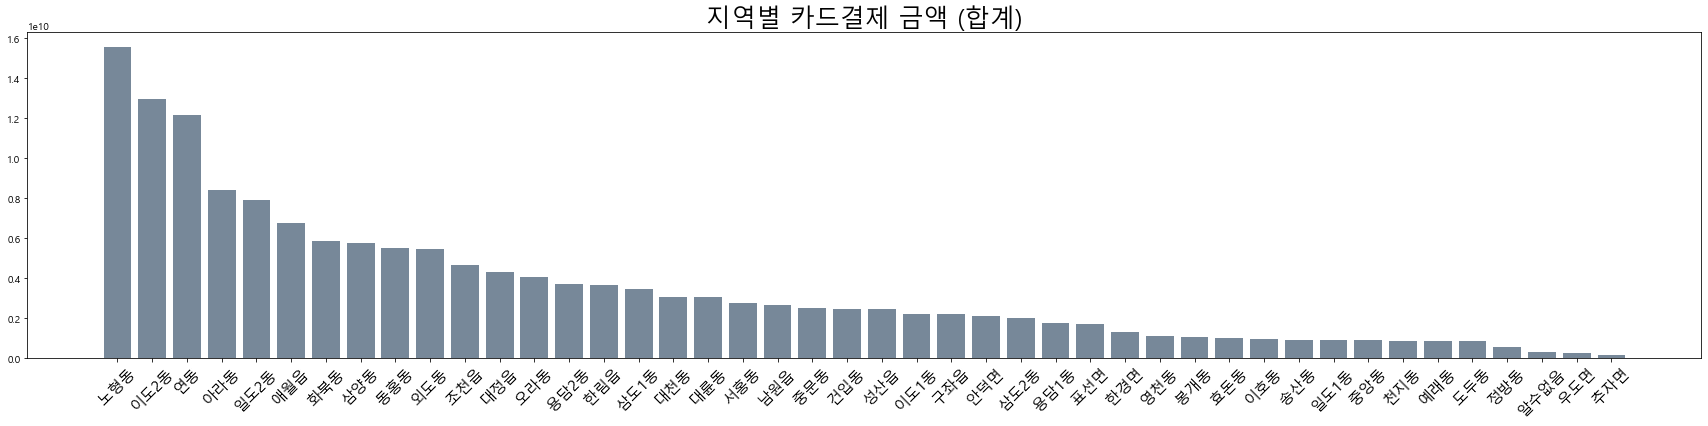

In [12]:
plt.figure(figsize=(30,6))
plt.rc('xtick',labelsize=15)
plt.xticks(rotation=45)
plt.title("지역별 카드결제 금액 (합계)",fontsize=25)
plt.bar(card_df_l.location, card_df_l.use_amt,color='lightslategrey')
# plt.savefig('ll_card.png')

In [13]:
# 업종별 그룹화
card_df_c = card_df.groupby(['base_date','mct_cat_nm']).sum().reset_index()
card_df_c

,base_date,mct_cat_nm,use_amt
0,2018_01,간식,3168683747
1,2018_01,농축수산물,6486446458
2,2018_01,마트/슈퍼마켓,43372633639
3,2018_01,배달,586618998
4,2018_01,부페,172514668
...,...,...,...
457,2021_06,아시아음식,4246061912
458,2021_06,양식,1756326724
459,2021_06,주점및주류판매,739915956
460,2021_06,패스트푸드,3233713856


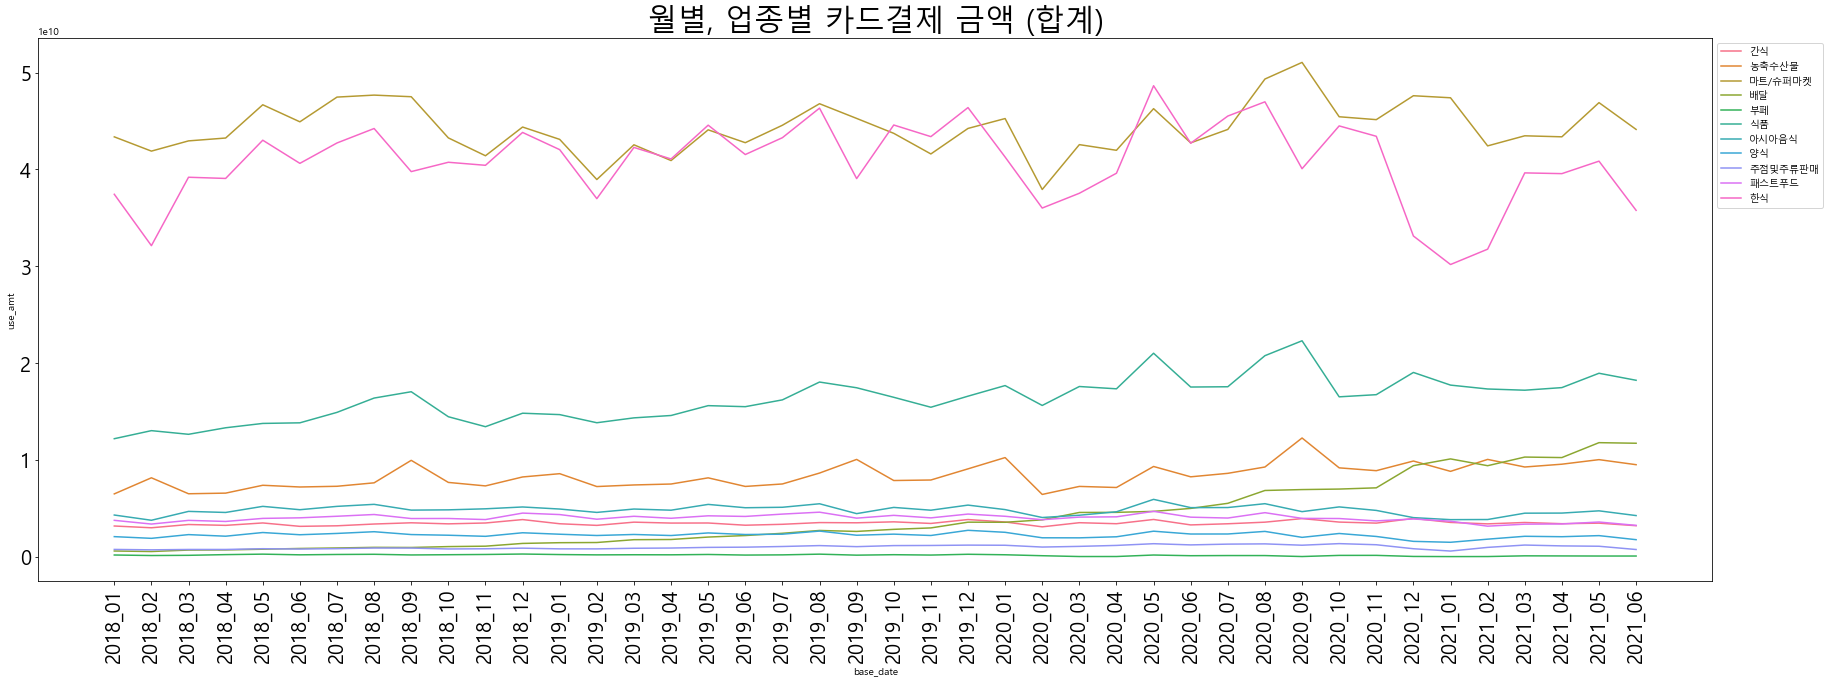

In [14]:
# 지역별, 월별 배출량 그래프

g = sns.lineplot(x="base_date", y="use_amt", hue="mct_cat_nm",data = card_df_c)

g.figure.set_figwidth(30)
g.figure.set_figheight(10)

plt.xticks(rotation = 90, fontsize = 20)  # x축 눈금
plt.yticks(fontsize = 20)  # y축 눈금

g.set_title("월별, 업종별 카드결제 금액 (합계)", fontsize = 30)

plt.legend(bbox_to_anchor = (1,1))  # 범례 위치
# plt.savefig('c_card.png')

In [15]:
# 업종별 그룹화
card_df_cat = card_df.groupby(['mct_cat_nm']).sum().reset_index()
card_df_cat = card_df_cat.sort_values(by=['use_amt'], axis=0,ascending=False)
card_df_cat

,mct_cat_nm,use_amt
2,마트/슈퍼마켓,1860801386448
10,한식,1712186420486
5,식품,685085950757
1,농축수산물,351475488512
6,아시아음식,201226534261
3,배달,170647358144
9,패스트푸드,166987679445
0,간식,144865710255
7,양식,93182213106
8,주점및주류판매,41543590921


<BarContainer object of 11 artists>

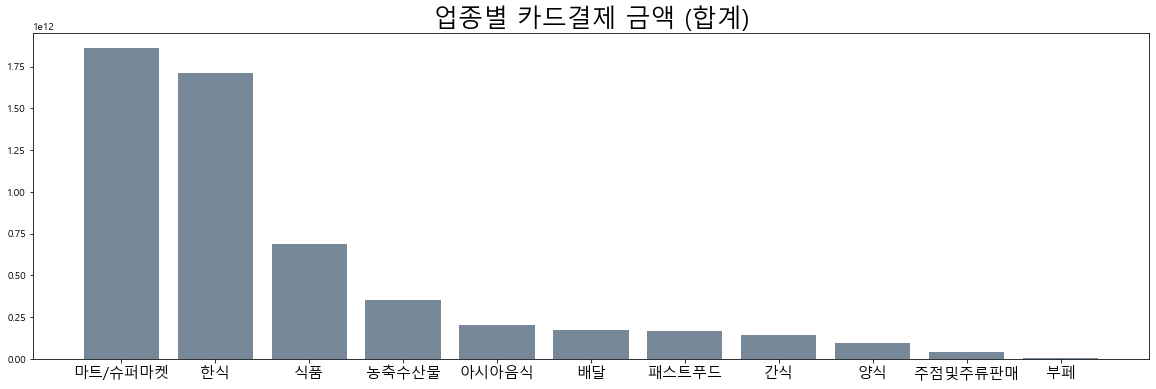

In [16]:
plt.figure(figsize=(20,6))
plt.rc('xtick',labelsize=15)
plt.title("업종별 카드결제 금액 (합계)",fontsize=25)
plt.bar(card_df_cat.mct_cat_nm, card_df_cat.use_amt,color='lightslategrey')
# plt.savefig('cat_card.png')